In [1]:
import os
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras import layers
from tensorflow.keras import models

import time

In [2]:
start = time.time()
datagen = ImageDataGenerator(rotation_range=40, 
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

In [3]:
folder_dir = os.getcwd()
original_dataset_dir = folder_dir + '/datasets/cats_and_dogs/train'

base_dir = folder_dir + '/datasets/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])
img_path = fnames[3]

img = load_img(img_path, target_size=(150, 150))
x = img_to_array(img)
# (150, 150, 3) > (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

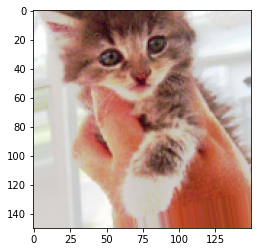

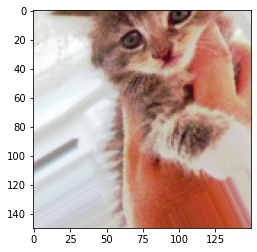

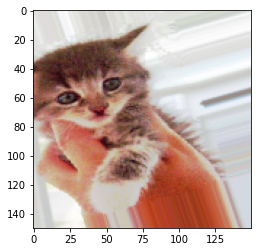

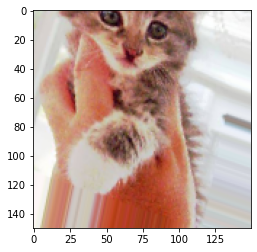

In [4]:
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

c:\Users\Ares\anaconda3\envs\tf26\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

model.save('./cats_and_dogs_small_2.h5')

c:\Users\Ares\anaconda3\envs\tf26\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 15s 108ms/step - loss: 0.6942 - acc: 0.5220 - val_loss: 0.6856 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 10s 104ms/step - loss: 0.6849 - acc: 0.5620 - val_loss: 0.6651 - val_acc: 0.6010
Epoch 3/100
100/100 [==============================] - 10s 103ms/step - loss: 0.6759 - acc: 0.5725 - val_loss: 0.6590 - val_acc: 0.6100
Epoch 4/100
100/100 [==============================] - 10s 102ms/step - loss: 0.6650 - acc: 0.6040 - val_loss: 0.6333 - val_acc: 0.6400
Epoch 5/100
100/100 [==============================] - 10s 102ms/step - loss: 0.6538 - acc: 0.6175 - val_loss: 0.6299 - val_acc: 0.6450
Epoch 6/100
100/100 [==============================] - 10s 100ms/step - loss: 0.6393 - acc: 0.6195 - val_loss: 0.6166 - val_acc: 0.6600
Epoch 7/100
100/100 [==============================] - 10s 100ms/step - loss: 0.6205 - acc: 0.6480 - val_loss: 0.6322 - val_acc: 0.6470
Epoch 8/100
100/100 [===========================

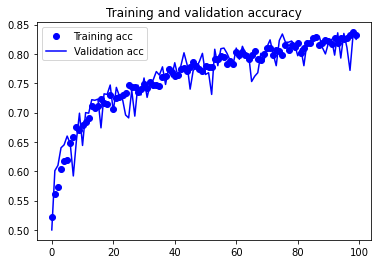

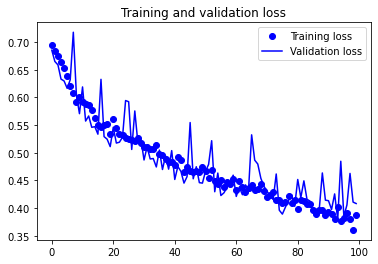

elapsed time: 1070.0448167324066


In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

print(f"elapsed time: {time.time() - start}")